In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Dimensions for HalfCheetah v2 dataset
# DO NOT TRY TO APPLY TO OTHERS WITHOUT CHECKING!
STATE_DIMS = 17
ACTION_DIMS = 6
REWARD_DIMS = 1
TERMINAL_DIMS = 1

DIMS = [STATE_DIMS, ACTION_DIMS, STATE_DIMS, REWARD_DIMS, TERMINAL_DIMS]
ENDS = np.cumsum(DIMS)

In [13]:
ENDS

array([17, 23, 40, 41, 42])

# Example Rollout from softlearning

In [34]:
EXAMPLE_ROLLOUT = "/home/ajc348/rds/hpc-work/softlearning/gym/HalfCheetah/v2/2022-05-17T18-38-36-half_cheetah_v2_3M/id=31acc_00000-seed=9479/short_rollouts/checkpoint_30/rollout_25000_0.npy"
example_rollout = np.load(EXAMPLE_ROLLOUT)
example_rollout.shape

(25000, 42)

In [35]:
ex_states, ex_actions, ex_next_states, ex_rewards, ex_dones, ex_policies = np.split(example_rollout, ENDS, axis=1)

In [36]:
ex_dones.sum()

0.0

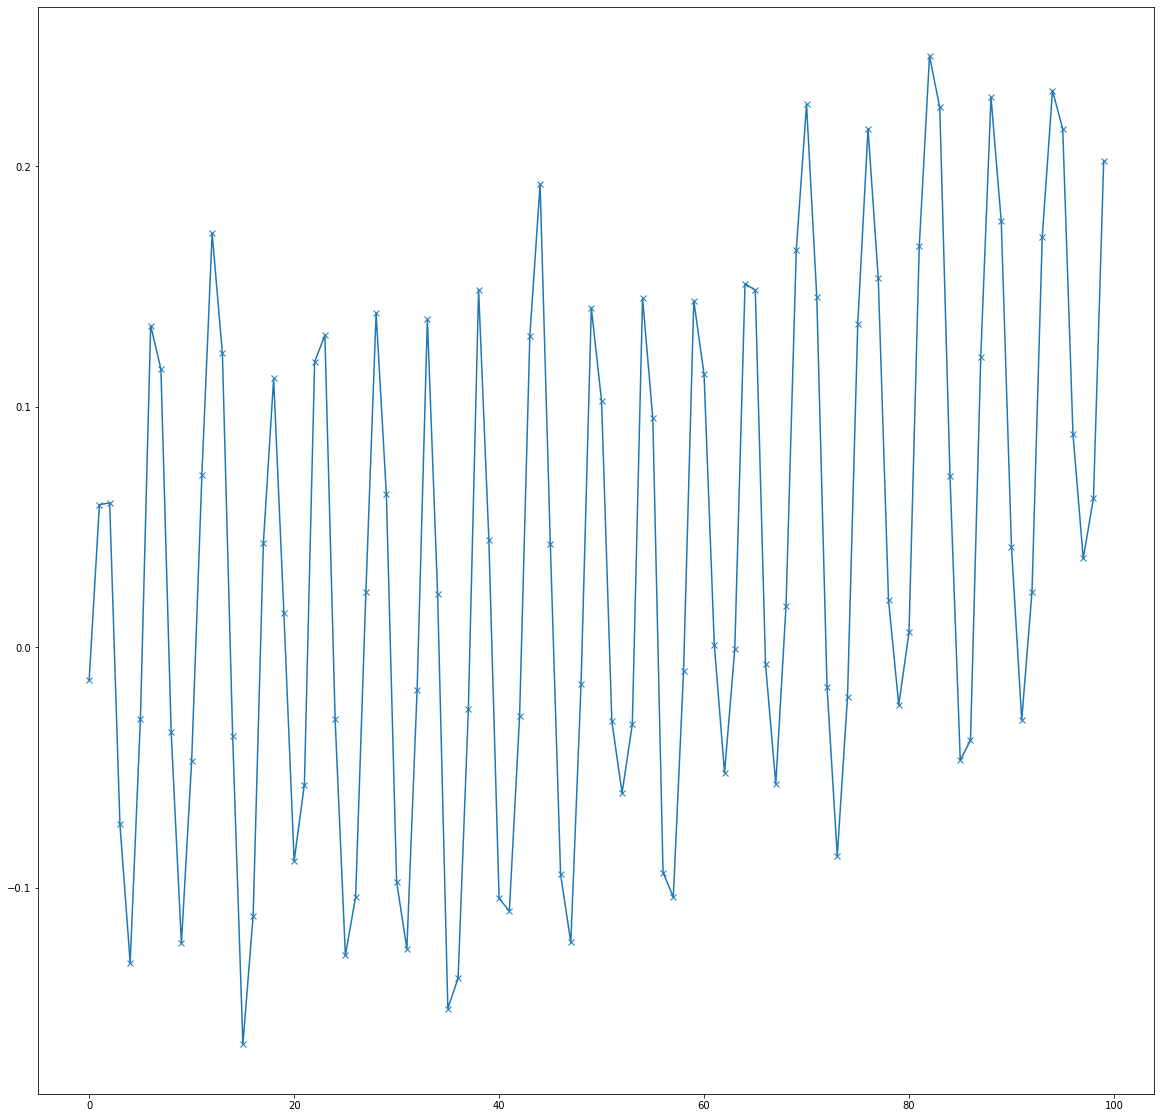

In [37]:
state_dim = 1
max_plot = 100
fig, ax = plt.subplots(1, 1, figsize=(20,20))
ax.plot(np.arange(ex_states.shape[0])[:max_plot], ex_states[:,state_dim][:max_plot], marker='x', ls='-')

# SAC - MP1: Multiple Policies

In [60]:
SAC_MP1_ROLLOUT = "rollouts/SAC-MP1.npy"
sac_mp1_rollout = np.load(SAC_MP1_ROLLOUT)
sac_mp1_rollout.shape

(100000, 43)

# SAC - PAP1: Paper Replication Rollout

In [38]:
SAC_PAP1_ROLLOUT = "rollouts/SAC-PAP1.npy"
sac_pap1_rollout = np.load(SAC_PAP1_ROLLOUT)
sac_pap1_rollout.shape

(101000, 43)

In [39]:
sac_pap1_states, sac_pap1_actions, sac_pap1_next_states, sac_pap1_rewards, sac_pap1_dones, sac_pap1_policies = np.split(sac_pap1_rollout, ENDS, axis=1)

In [40]:
sac_pap1_policies.sum()

50500.0

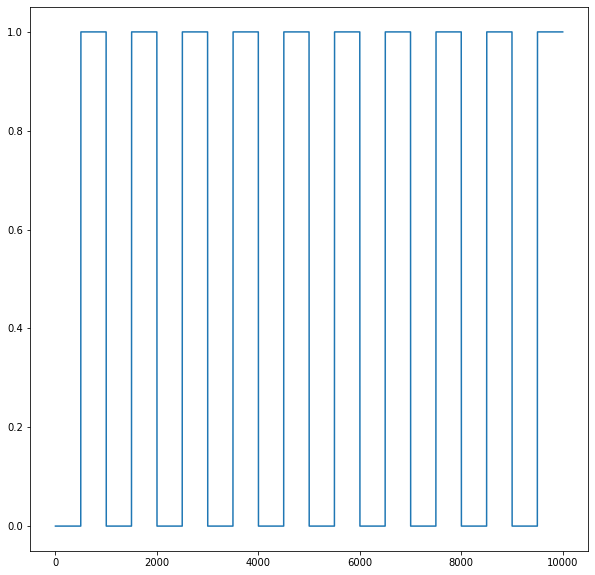

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(sac_pap1_policies[:10000])

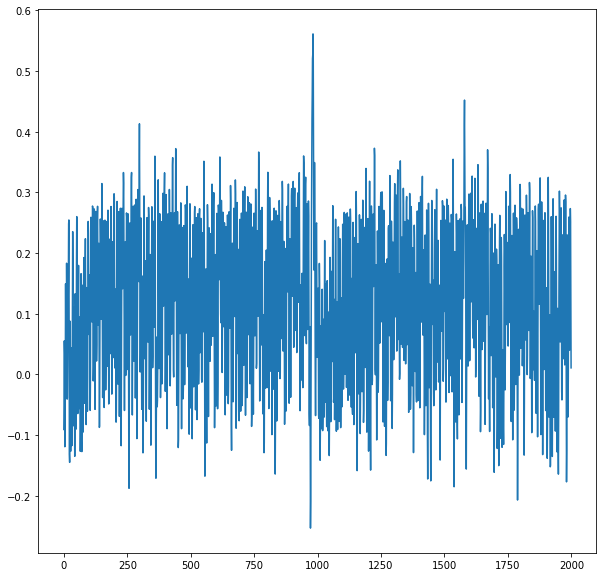

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(sac_pap1_states[:2000,1])

# D4RL - HC-MR: D4RL Dataset

In [43]:
D4RL_HC_MR_ROLLOUT = "/home/ajc348/rds/hpc-work/mopo/rollouts/D4RL-HC-MR.npy"
d4rl_hc_mr_rollout = np.load(D4RL_HC_MR_ROLLOUT)
d4rl_hc_mr_rollout.shape

(100899, 43)

In [44]:
d4rl_hc_mr_states, d4rl_hc_mr_actions, d4rl_hc_mr_next_states, d4rl_hc_mr_rewards, d4rl_hc_mr_dones, d4rl_hc_mr_policies = np.split(d4rl_hc_mr_rollout, ENDS, axis=1)

In [59]:
d4rl_hc_mr_policies.sum()

0.0

# d3rlpy - D3RLPY-PEP1

In [32]:
D3RLPY_PEP1_ROLLOUT = "rollouts/D3RLPY-PEP1.npy"
d3rlpy_pep1_rollout = np.load(D3RLPY_PEP1_ROLLOUT)
d3rlpy_pep1_rollout.shape

(101000, 43)

In [33]:
d3rlpy_pep1_states, d3rlpy_pep1_actions, d3rlpy_pep1_next_states, d3rlpy_pep1_rewards, d3rlpy_pep1_dones, d3rlpy_pep1_policies = np.split(d3rlpy_pep1_rollout, ENDS, axis=1)

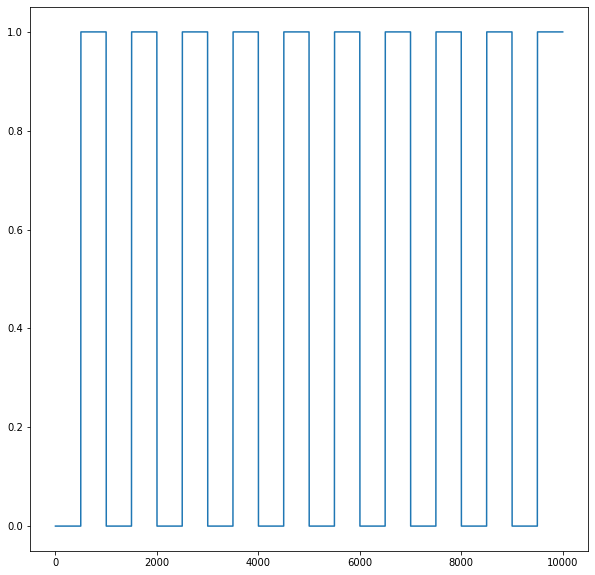

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(d3rlpy_pep1_policies[:10000])

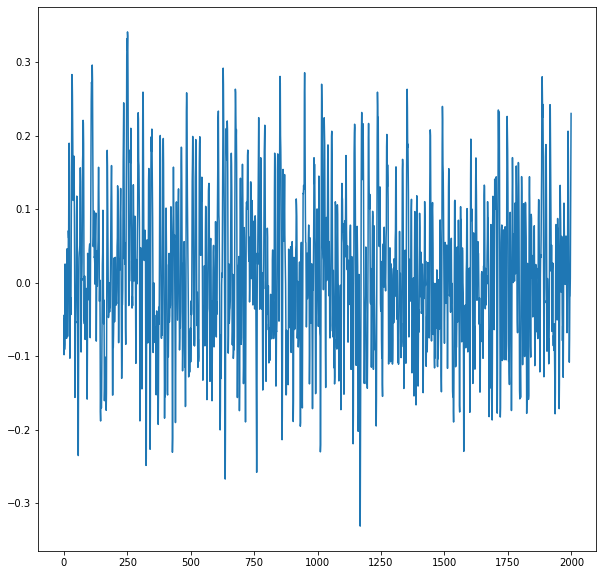

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(d3rlpy_pep1_states[:2000,1])

# Comparisons

In [58]:
sac_pap1_rollout.shape, d4rl_hc_mr_rollout.shape, d3rlpy_pep1_rollout.shape

((101000, 43), (100899, 43), (101000, 43))

In [54]:
# assert not np.testing.assert_equal(sac_pap1_rollout, d4rl_hc_mr_rollout)
# assert not np.testing.assert_equal(sac_pap1_rollout, d3rlpy_pep1_states)

In [55]:
sac_pap1_states.mean(axis=0), d4rl_hc_mr_states.mean(axis=0), d3rlpy_pep1_states.mean(axis=0)

(array([-1.39854801e-02,  1.10832181e-01,  1.59034936e-01, -2.39362367e-01,
        -9.79487713e-02, -9.86026705e-02,  1.03556377e-01, -9.48115863e-03,
         1.07946678e+01, -4.53784118e-02, -1.06163224e-01, -2.11207422e-01,
         4.67546549e-01, -1.52118371e-01,  2.67556669e-01, -3.19338392e-01,
        -1.15218613e-01]),
 array([-1.60075310e-01,  8.29875514e-01,  1.39474658e-02,  8.88920702e-02,
         5.18356778e-02,  2.88052177e-03, -1.25160294e-01, -1.71231028e-01,
         2.67848890e+00, -4.88675893e-02, -5.26428757e-02,  3.56060975e-03,
        -1.63943569e-01, -5.18595389e-02, -2.27030332e-03,  1.08392543e-01,
         7.73432485e-02]),
 array([-0.08426165,  0.02778835,  0.03355197,  0.1332336 ,  0.05317528,
         0.41914601, -0.02678268,  0.4021132 ,  4.78576278, -0.07808562,
        -0.09033775, -0.12855874, -0.32326243,  0.51880357, -0.05658567,
         0.38029783,  0.01612455]))

In [56]:
sac_pap1_states.var(axis=0), d4rl_hc_mr_states.var(axis=0), d3rlpy_pep1_states.var(axis=0)

(array([2.02303677e-03, 1.54502734e-02, 2.84418220e-01, 5.98309874e-02,
        1.16751156e-01, 4.13076917e-01, 2.38695074e-01, 1.37540882e-01,
        4.29452909e+00, 7.72891187e-01, 5.28370848e+00, 1.21627992e+02,
        4.26987643e+01, 6.29387055e+01, 1.77283910e+02, 1.26499929e+02,
        6.39212476e+01]),
 array([4.48731015e-02, 2.17755594e+00, 1.60466921e-01, 1.36758529e-01,
        1.81669905e-01, 2.33120355e-01, 1.48929616e-01, 1.06913567e-01,
        5.23599615e+00, 8.40990502e-01, 2.84535784e+00, 1.09931946e+02,
        8.47217140e+01, 1.30543808e+02, 6.39134650e+01, 7.53581623e+01,
        4.19206373e+01]),
 array([3.58341606e-03, 1.67052192e-02, 1.59223171e-01, 1.99035887e-01,
        1.47767189e-01, 5.84188635e-02, 3.35187772e-01, 1.36295229e-02,
        1.51168330e+00, 1.01198316e+00, 2.01385812e+00, 1.44430813e+02,
        1.54157019e+02, 1.36890503e+02, 6.14222485e+01, 3.28258835e+02,
        9.09143345e+00]))